In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from portfolio import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
assets = ['imeu','ceu','smea']
assets = ['inaa','iusa','csspx']
assets = ['xgle', 'ibtm', 'ibgm', 'ibgl','em15']
assets = ['iusa','imeu','ibtm','xgle','phau']
assets = ['em15', 'ibtm', 'iusa', 'smea', 'phau']
assets = ['eue','exsi','c50','imeu','ceu','smea','mse']
assets = ['ceu','smea']
assets = ['iuse','xspx','xd9u','useuwh','csspx','a500']  # az usa hedged e non hedged
assets = ['lowv','csspx','mvus']  # low volatility az americano
assets = ['xesc','mveu','smea']  # low volatility az eu
assets = ['phau','bull','xad1','gbs','sgld']
assets = ['euro','c50','xesc','xmeu']  # az eu
assets = ['iuse','xspx','xd9u','useuwh','csspx','a500']  # az usa hedged e non hedged
assets = ['em13','em35','em57','em710','em1015','em15','emg']  # obb eu tutte le scadenze

In [135]:
with open('titoli.txt', 'r') as f:
    assets = f.readlines()
    assets = [x.strip().lower() for x in assets]

In [145]:
data = read_quotes(assets)

In [123]:
# correzione SMEA
if 'smea' in assets:
    x1 = data.smea.idxmin()
    data.smea.loc[x1] = data.smea.loc[x1 - pd.Timedelta(days=1)]

In [88]:
# correzione SMEA
if 'eue' in assets:
    x1 = data.eue.idxmin()
    data.eue.loc[x1] = data.eue.loc[x1 - pd.Timedelta(days=1)]

In [146]:
norm_data = data/data.iloc[0]

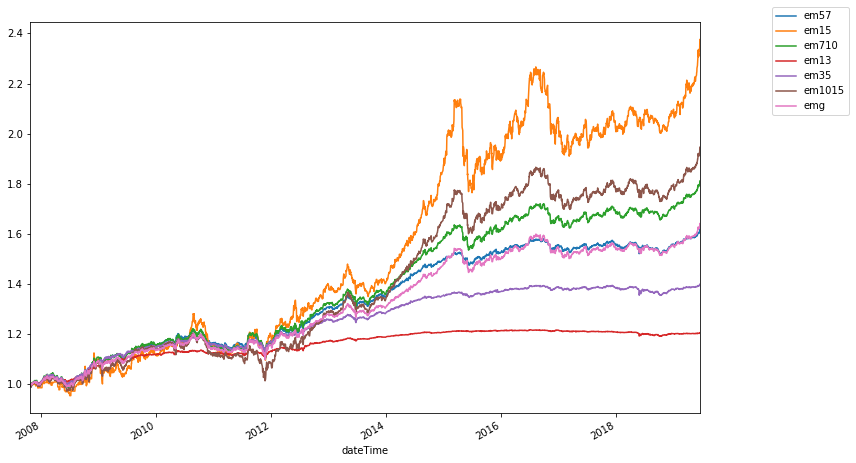

In [147]:
ax1 = norm_data.plot(figsize=(12,8))
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, bbox_to_anchor=(1.1, 1.05))  # legend for first two lines only

In [148]:
returns = np.log(norm_data/norm_data.shift(1))
returns.dropna(inplace=True)

In [149]:
returns.describe()

,em57,em15,em710,em13,em35,em1015,emg
count,2954.000000,2954.000000,2954.000000,2954.000000,2954.000000,2954.000000,2954.000000
mean,0.000163,0.000293,0.000201,0.000063,0.000113,0.000225,0.000168
std,0.002372,0.005843,0.003101,0.000889,0.001651,0.004040,0.002517
min,-0.015234,-0.034095,-0.015363,-0.006987,-0.013454,-0.023935,-0.012383
25%,-0.000988,-0.002575,-0.001378,-0.000323,-0.000654,-0.001899,-0.001137
50%,0.000191,0.000000,0.000290,0.000079,0.000131,0.000259,0.000273
75%,0.001365,0.003290,0.001775,0.000426,0.000851,0.002412,0.001609
max,0.019028,0.037154,0.029294,0.007864,0.017142,0.039051,0.015763


In [ ]:
fig = plt.figure(figsize = (12,40))
#plt.grid(True)
#plt.xlabel('expected volatility')
#plt.ylabel('expected return')
#plt.colorbar(label = 'Sharpe Ratio')
#plt.title('Monte Carlo Simulation Efficient Frontier')
#plt.scatter(myvols, myrets, c = myrets / myvols, marker = '+', cmap='coolwarm')
norm_data.plot(subplots=True, figsize=(12,40))
#plt.plot(norm_data)
plt.show();

In [82]:
# SALVA LE QUOTAZIONI su file
# df.to_csv('quote_mach2.csv')
